# Superstore - Profit and Sales Analysis

Welcome! In this notebook, we'll take a look on the result of profit and sales between 2011 and 2014.
This analysis pretends to **answer** these following questions:

1. How much did by year the store make and sell between 2011 and 2014?
2. How much did by month the store make and sell between 2011 and 2014?
3. Which was the most profitable category, and which sold the most?
4. Which was the most profitable sub-category, and which sold the most?
5. Which was the most profitable segment, and which sold the most?
6. Which country bought the most, and which made the most profit?
7. Which country bought the less, and which made the less profit? There was negative profit?

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import calendar
plt.rc('axes', axisbelow=True)
sns.set_style("whitegrid")

In [168]:
base = pd.read_csv('../input/superstore-data/superstore_dataset2011-2015.csv', encoding='latin-1')
base.shape

(51290, 24)

In [169]:
base.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [170]:
base.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [171]:
base.duplicated().sum()

0

In [172]:
base.drop(['Postal Code'], axis=1, inplace=True)

# 1. How much did by year the store make and sell between 2011 and 2014?

In [173]:
# Total sales
print('Total sales:', base['Sales'].sum())
print('Total profit:', base['Profit'].sum())

Total sales: 12642501.90988
Total profit: 1467457.2912800002


In [174]:
# Sales and profit by year
base['Order Date'] = pd.to_datetime(base['Order Date'])
base['Order Year'] = base['Order Date'].dt.year
grup_y = base.groupby(['Order Year']).sum().reset_index()
grup_y

,Order Year,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
0,2011,235388025,2.259451e+06,31443,1333.394,248940.81154,244271.08
1,2012,277692065,2.677439e+06,38111,1548.774,307415.27910,283491.89
2,2013,347629160,3.405746e+06,48136,1935.522,406935.23018,364549.95
3,2014,454648445,4.299866e+06,60622,2512.038,504165.97046,460507.77


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


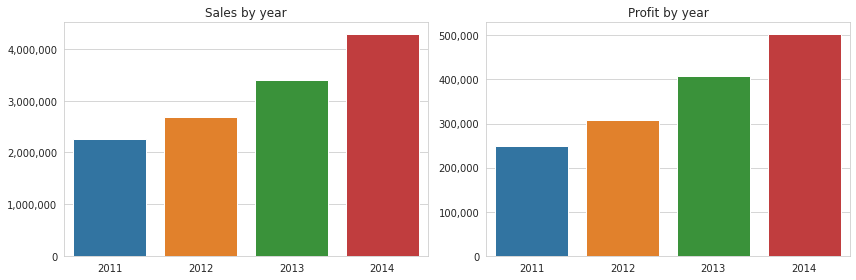

In [175]:
# Sales by year
plt.figure(figsize=(12,4), tight_layout=True)
plt.subplot(1,2,1)
g1 = sns.barplot(x= 'Order Year', y= 'Sales', data= grup_y)
g1.set(xlabel=None, ylabel=None, title='Sales by year')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# Profit by year
plt.subplot(1,2,2)
g2 = sns.barplot(x= 'Order Year', y= 'Profit', data= grup_y)
g2.set(xlabel=None, ylabel=None, title='Profit by year')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig1.png')
plt.show()

### As we can see, the best year for this store in terms of sales and profit was 2014, the last year. From the beggining, the store showed a growth trend.

# 2. How much did by month the store make and sell between 2011 and 2014?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


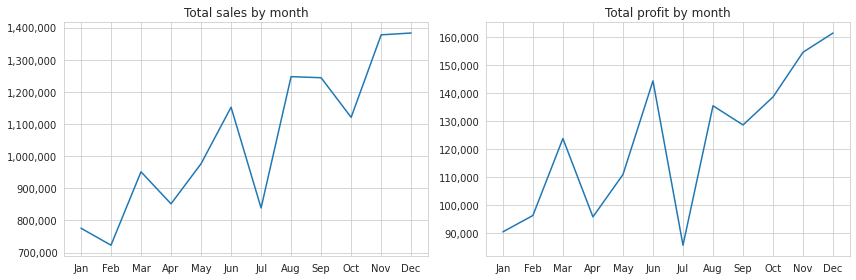

In [176]:
resul = pd.DataFrame()
resul['Month'] = anog[2011]['Order Month']
resul['Sales'] = anog[2011]['Sales'] + anog[2012]['Sales'] + anog[2013]['Sales'] + anog[2014]['Sales']
resul['Profit'] = anog[2011]['Profit'] + anog[2012]['Profit'] + anog[2013]['Profit'] + anog[2014]['Profit']

plt.figure(figsize=(12,4), tight_layout=True)
plt.subplot(1,2,1)
r1 = sns.lineplot(x='Month', y='Sales', data=resul)
r1.set(xlabel=None, ylabel=None, title='Total sales by month')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.subplot(1,2,2)
r2 = sns.lineplot(x='Month', y='Profit', data=resul)
r2.set(xlabel=None, ylabel=None, title='Total profit by month')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig3.png')
plt.show()

### In total, the best month for sales and profit was December, as expected, because the major segment was the Consumer.

In [177]:
base['Order Month'] = base['Order Date'].dt.month

ano = {}

for i in base['Order Year'].unique():
    ano[i] = base.loc[base['Order Year'] == i]

In [178]:
anog = {}

for i, df in ano.items():
    anog[i] = ano[i].groupby(['Order Month']).sum().reset_index()
    anog[i]['Order Year'] = i
    anog[i]['Order Month'] = anog[i]['Order Month'].apply(lambda x: calendar.month_abbr[x])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWa

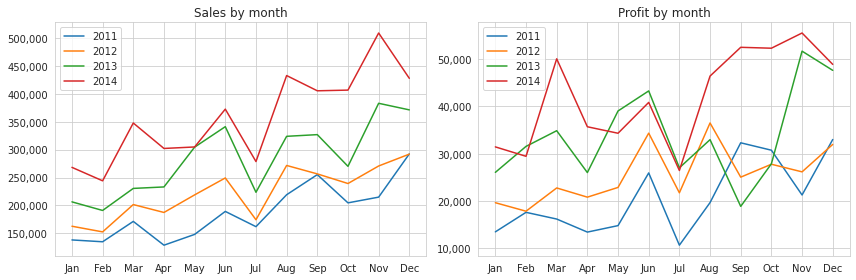

In [179]:
plt.figure(figsize=(12,4), tight_layout=True)
for i, df in anog.items():
    plt.subplot(1,2,1)
    s = sns.lineplot(x='Order Month', y='Sales', data=anog[i], label=i)
    s.set(xlabel=None, ylabel=None, title='Sales by month')
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    plt.legend()
    plt.subplot(1,2,2)
    s2 = sns.lineplot(x='Order Month', y='Profit', data=anog[i], label=i)
    s2.set(xlabel=None, ylabel=None, title='Profit by month')
    current_values = plt.gca().get_yticks()
    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    plt.legend()
plt.savefig('fig2.png')
plt.show()

### Although December was the most profitable month overall, in the last year the most profitable was November. The same conclusion is valid for sales, and for 2013.

# 3. Which was the most profitable category, and which sold the most?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


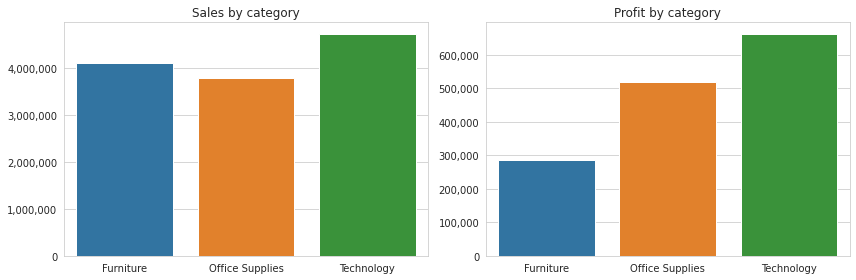

In [180]:
grup_cat = base.groupby(['Category']).sum().reset_index()
grup_cat

plt.figure(figsize=(12,4), tight_layout=True)
plt.subplot(1,2,1)
# Sales by category
g3 = sns.barplot(x='Category', y='Sales', data=grup_cat)
g3.set(xlabel=None, ylabel=None, title='Sales by category')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# Profit by category
plt.subplot(1,2,2)
g4 = sns.barplot(x='Category', y='Profit', data=grup_cat)
g4.set(xlabel=None, ylabel=None, title='Profit by category')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig4.png')
plt.show()

### Technology sold the most, and was the most profitable category. But furniture, despite having sold more than Office Supplies, it made less profit than it.

# 4. Which was the most profitable sub-category, and which sold the most?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


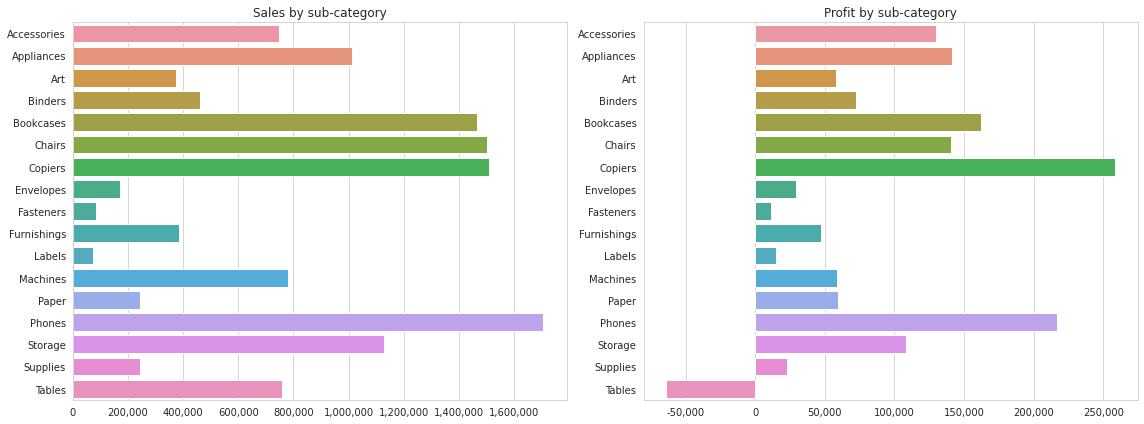

In [181]:
grup_subcat = base.groupby(['Sub-Category']).sum().reset_index()

plt.figure(figsize=(16,6), tight_layout=True)
plt.subplot(1,2,1)
# Sales by sub-category
g5 = sns.barplot(y='Sub-Category', x='Sales', data=grup_subcat, orient='h')
g5.set(xlabel=None, ylabel=None, title='Sales by sub-category')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
# Profit by subcategoria
plt.subplot(1,2,2)
g6 = sns.barplot(y='Sub-Category', x='Profit', data=grup_subcat, orient='h')
g6.set(xlabel=None, ylabel=None, title='Profit by sub-category')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig5.png')
plt.show()

### Looking at the graphs, we can see that the subcategories who sold the most, didn't make the highest profit.
### Phones was the most sold sub-category, and Copiers was the most profitable sub-category.
### Tables reached almost 800,000 in sales, but made more than 50,000 in negative profit.

# 5. Which was the most profitable segment, and which sold the most?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


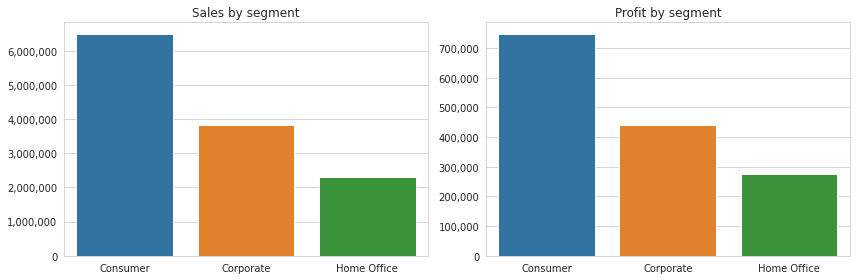

In [182]:
grup_seg = base.groupby(['Segment']).sum().reset_index()

# Sales by segment
plt.figure(figsize=(12,4), tight_layout=True)
plt.subplot(1,2,1)
g7 = sns.barplot(x='Segment', y='Sales', data=grup_seg)
g7.set(xlabel=None, ylabel=None, title='Sales by segment')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# Profit by segment
plt.subplot(1,2,2)
g8 = sns.barplot(x='Segment', y='Profit', data=grup_seg)
g8.set(xlabel=None, ylabel=None, title='Profit by segment')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig6.png')
plt.show()

### Consumer was the major segment, and it contributes for December be the most profitable and the month who most sold.

# 6. Which country bought the most, and which made the most profit?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


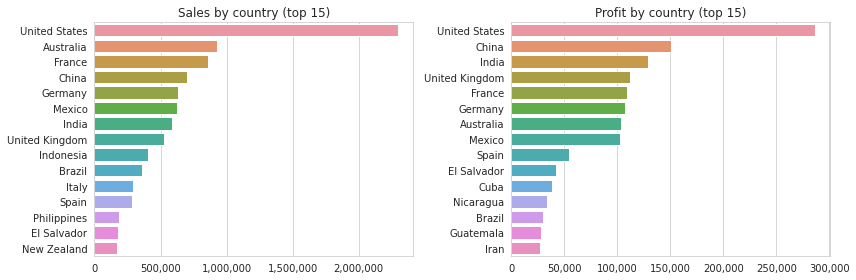

In [183]:
grup_country = base.groupby(['Country']).sum().reset_index().sort_values(by='Sales', ascending=False).head(15)
grup_country2 = base.groupby(['Country']).sum().reset_index().sort_values(by='Profit', ascending=False).head(15)

# Sales by country
plt.figure(figsize=(12,4), tight_layout=True)
plt.subplot(1,2,1)
g9 = sns.barplot(x='Sales', y='Country', data=grup_country)
g9.set(xlabel=None, ylabel=None, title='Sales by country (top 15)')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
# Profit by country
plt.subplot(1,2,2)
g10 = sns.barplot(x='Profit', y='Country', data=grup_country2)
g10.set(xlabel=None, ylabel=None, title='Profit by country (top 15)')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig7.png')
plt.show()

### The country who buyed the most was United States, and it was the most profitable too. But, in profit terms, the second one was Chine, although in sales was Australia.
### In this graph, we can see that sales didn't mean profit. For example, Iran pops up in the most profitables countries, but we can't see that country in the countries who most sold.

# 7. Which country bought the less, and which made the less profit? There was negative profit?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


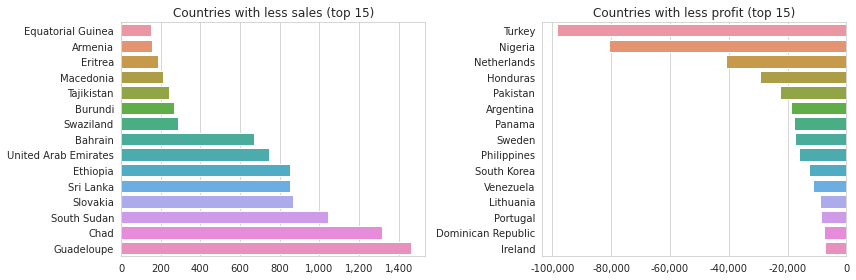

In [184]:
grup_country3 = base.groupby(['Country']).sum().reset_index().sort_values(by='Sales', ascending=True).head(15)
grup_country4 = base.groupby(['Country']).sum().reset_index().sort_values(by='Profit', ascending=True).head(15)

# Sales by country
plt.figure(figsize=(12,4), tight_layout=True)
plt.subplot(1,2,1)
g9 = sns.barplot(x='Sales', y='Country', data=grup_country3)
g9.set(xlabel=None, ylabel=None, title='Countries with less sales (top 15)')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
# Profit by country
plt.subplot(1,2,2)
g10 = sns.barplot(x='Profit', y='Country', data=grup_country4)
g10.set(xlabel=None, ylabel=None, title='Countries with less profit (top 15)')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig8.png')
plt.show()

### On the graph on right side, there is a list of countries who make negative profit, and it is a good idea stop selling to they. On the graph on left side, whe can see the countries who less buy, but don't implies loss.

# Regions.

### The regions were not well defined. So we won't get deep into it.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


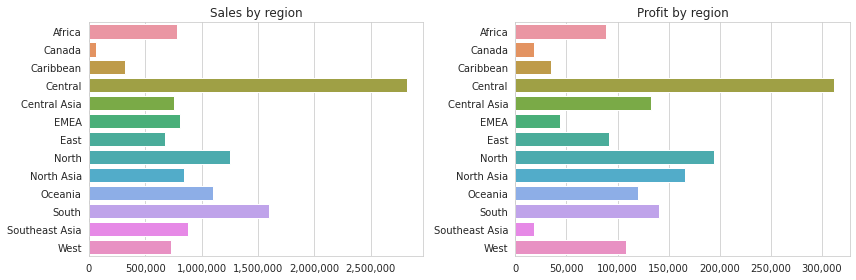

In [185]:
grup_reg = base.groupby(['Region']).sum().reset_index()

# Sales by region
plt.figure(figsize=(12,4), tight_layout = True)
plt.subplot(1,2,1)
g11 = sns.barplot(y='Region', x='Sales', data=grup_reg, orient='h')
g11.set(xlabel=None, ylabel=None, title='Sales by region')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
# Profit by region
plt.subplot(1,2,2)
g12 = sns.barplot(y='Region', x='Profit', data=grup_reg, orient='h')
g12.set(xlabel=None, ylabel=None, title='Profit by region')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.savefig('fig9.png')
plt.show()